# Analysis and visualization of Baywheels 

#### By Lei Zhang

## Introduction

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019.I am going to analyze the latest monthly trip data(August 2020) of Bay wheels bike.  

This dataset is available here:https://s3.amazonaws.com/baywheels-data/202008-baywheels-tripdata.csv.zip


In [94]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta 
# import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline

In [95]:
# read the data
df = pd.read_csv('202008-baywheels-tripdata.csv')

## Preliminary Wrangling

In [83]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,104206.000000,101349.000000,152446.000000,152446.000000,152246.000000,152246.000000
mean,224.407261,220.555881,37.729328,-122.355459,37.729155,-122.350376
std,173.466608,174.087160,0.142196,0.171591,0.172028,0.681279
min,3.000000,3.000000,37.240000,-122.510000,0.000000,-122.510000
25%,72.000000,72.000000,37.760000,-122.433280,37.760000,-122.432642
50%,145.000000,139.000000,37.773571,-122.413371,37.773556,-122.413200
75%,386.000000,384.000000,37.787883,-122.392553,37.788160,-122.392673
max,538.000000,538.000000,37.880222,-121.770000,37.880222,0.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             152446 non-null  object 
 1   rideable_type       152446 non-null  object 
 2   started_at          152446 non-null  object 
 3   ended_at            152446 non-null  object 
 4   start_station_name  104206 non-null  object 
 5   start_station_id    104206 non-null  float64
 6   end_station_name    101349 non-null  object 
 7   end_station_id      101349 non-null  float64
 8   start_lat           152446 non-null  float64
 9   start_lng           152446 non-null  float64
 10  end_lat             152246 non-null  float64
 11  end_lng             152246 non-null  float64
 12  member_casual       152446 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.1+ MB


In [37]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [38]:
df.shape

(152446, 13)

In [39]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    48240
start_station_id      48240
end_station_name      51097
end_station_id        51097
start_lat                 0
start_lng                 0
end_lat                 200
end_lng                 200
member_casual             0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['rideable_type'].value_counts()

electric_bike    104200
docked_bike       48246
Name: rideable_type, dtype: int64

In [13]:
df['member_casual'].value_counts()

casual    90548
member    61898
Name: member_casual, dtype: int64

In [14]:
df['end_station_name'].value_counts()[:10]

Market St at 10th St                            1492
Powell St BART Station (Market St at 4th St)    1272
Fell St at Stanyan St                           1199
Mission Dolores Park                            1113
4th St at Mission Bay Blvd S                    1069
4th St at 16th St                                978
Market St at Steuart St                          958
17th St at Valencia St                           947
Market St at Dolores St                          925
Mission Playground                               913
Name: end_station_name, dtype: int64

In [15]:
df['start_station_name'].value_counts()[:10]

Market St at 10th St                            1545
Fell St at Stanyan St                           1215
Powell St BART Station (Market St at 4th St)    1158
Hyde St at Post St                              1057
Mission Dolores Park                             998
4th St at 16th St                                980
4th St at Mission Bay Blvd S                     974
Market St at Dolores St                          971
Market St at Steuart St                          900
Berry St at 4th St                               859
Name: start_station_name, dtype: int64

### fix data type

In [96]:
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['start_lat'] = df['start_lat'].astype(str)
df['start_lng'] = df['start_lng'].astype(str)
df['end_lat'] = df['end_lat'].astype(str)
df['end_lng'] = df['end_lng'].astype(str)

### calculate the duration 

In [97]:
df['duration'] = df['ended_at'] - df['started_at']
df['duration_in_sec'] = df['duration'].dt.total_seconds()
df['duration_in_min'] = df['duration_in_sec']/60
df['duration_in_min'] = df['duration_in_min'].apply(lambda x: str(x).split('.')[0] + '.' + str(x).split('.')[1][:2])
df['duration_in_min'] = df['duration_in_min'].astype('float')

In [98]:
df.drop(['duration','duration_in_sec'],axis = 1,inplace = True)

### extract the hour of the day and day of week for the start time

In [99]:
df['start_hour'] = df['started_at'].dt.hour
df['start_dayofweek'] = df['started_at'].dt.strftime('%a')

### drop those rows whose duration is negative and larger than 200

In [100]:
df.shape

(152446, 16)

### What is the structure of your dataset?
There are 151797 entries and 16 features in my dataset.Only the start hour and duration in time are numberic variables.rideable_type and member_casual are categorical variables.start_at and ended_at are datetime variables.The rest are all strings.The dataset was further enhanced with new features that I may find them necessary for further analysis ,which are the duration in min, start day of the week and start hour.

trip duration info: duration_in_min,start_at,ended_at, start_hour,start_dayofweek  

station info: start_station_name, start_station_id, end_station_name, end_station_id, start_lat,    start_lng,end_lat,end_lat   

member info: ride_id, rideable_type, member_casual




### What is the main feature(s) of interest in your dataset
I am interested in what features are correlated with the duration in min.

### What features in the dataset do you think will help support your investigation into features of interests?
The categorical variables rideable_type, member_casual,start day of week and the numberic variable start hour of the day will be used for analysis.

## Univariate Visualization

In [23]:
sample = np.random.choice(df.shape[0],500,replace = False)
df_sample = df.loc[sample,:]

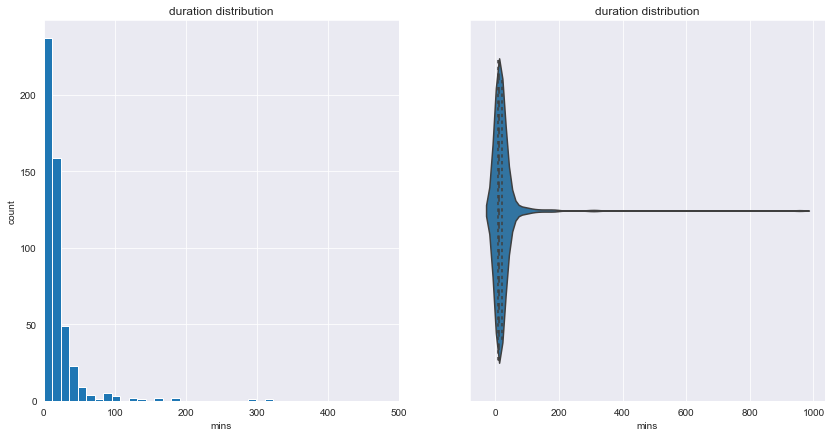

In [24]:
# Take a glimpse of the distribution
sns.set_style('darkgrid')
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
plt.hist(df_sample['duration_in_min'],bins = 80)
plt.xlim((0,500))
plt.xlabel('mins')
plt.ylabel('count')
plt.title('duration distribution');

plt.subplot(1,2,2)
sns.violinplot(data = df_sample,x = 'duration_in_min',inner = 'quartile')
plt.xlabel('mins')
plt.title('duration distribution');

#### Observations:
I randomly sampled 500 observations in the dataset.The distribution is extremely right skewed.

In [37]:
df['duration_in_min'].describe()

count    152446.000000
mean         25.839429
std         338.140781
min          -5.780000
25%           7.150000
50%          12.560000
75%          21.800000
max       44436.650000
Name: duration_in_min, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest.Were there any unusual points?Did you need to perform any transformation?
There are There are extremely large outliers like 44436 while the median is only 12.56 and the third quantile is 21.8.Let's Calculate the upper bound for outliers: 
IQR = Q3 - Q1 = 14.65  
Upper bound for outliers = 1.5 * IQR + Q3 = 43.775

I decided to drop those outliers which are larger than 200 and those incorrect values less than 0.

In [90]:
df = df[(df['duration_in_min'] > 0)&(df['duration_in_min'] <=200)]

### Of the features you investigated, were there any unusual distribution?Did you perform any operations on the data to tidy,adjust or change the form of the data?If so,why did you do this?
I randomly sampled 500 observations in the dataset.The distribution is extremely right skewed.I transformed duration_in_min to logged form so that the distribution will be normally distributed,which will be easier for further investigation.

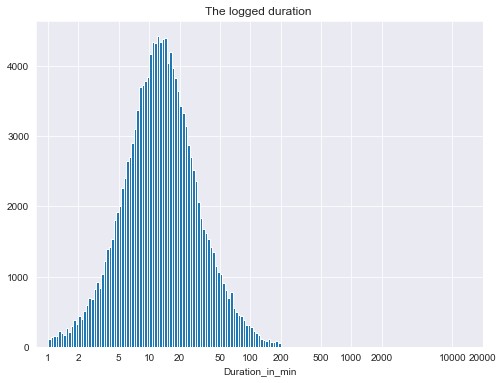

In [39]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_in_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=(8, 6))
plt.hist(data = df, x = 'duration_in_min', bins = bins)
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000,10000,20000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000,10000,20000]);
plt.xlabel('Duration_in_min')
plt.title('The logged duration ');

#### Observations:
The logged duration_in_min is almost normally distributed.Now let's take a look at the start hour of the day distribution

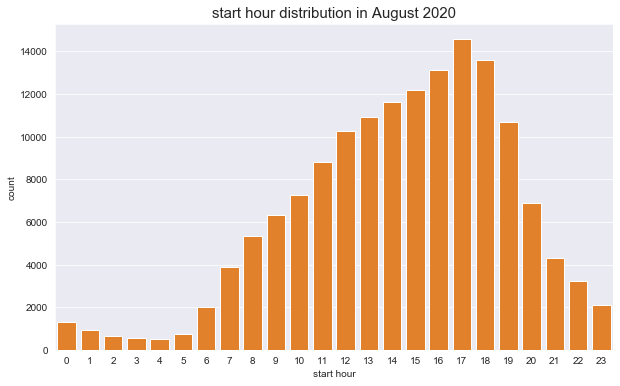

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
base_color = sns.color_palette()[1]
sns.countplot(df['start_hour'],color = base_color)
plt.title('start hour distribution in August 2020',fontsize = 15)
plt.xlabel('start hour');

#### Observations:

17 is the most popular start hour of Baywheels bicycle rent,followed by 18 and 16.This is probally due to evening traffic rush hour.4 and 5 are the least popular hour in this distribution.

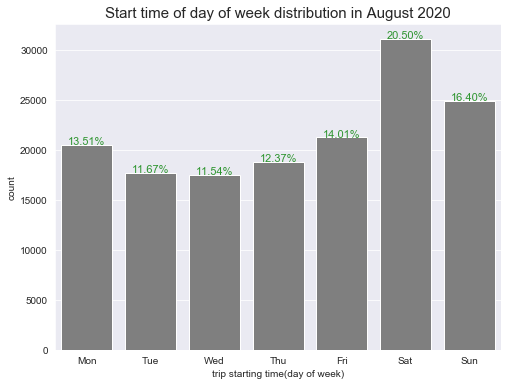

In [41]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_dayofweek'] = df['start_dayofweek'].astype(ordered_weekdays)

plt.figure(figsize = (8,6))
base_color = sns.color_palette()[7]
sns.countplot(data = df,x = 'start_dayofweek',color = base_color)
plt.title('Start time of day of week distribution in August 2020',fontsize = 15)
plt.xlabel('trip starting time(day of week)')

weekday_distribution = df.groupby('start_dayofweek').size()
for i in range(weekday_distribution.shape[0]):
    count = weekday_distribution[i]
    pct_string = '{:.2f}%'.format(count*100/df.shape[0])
    plt.text(i,count+50,pct_string,ha = 'center',alpha = 0.8,size = 11,color = 'green');

#### Observations:
Saturdays and sundays are the two days of the week that have most of the bikers,constituting more than 1/3 of the whole week count.Tuesdays and wednesdays are the two day that have least of the bikers.

In [42]:
start = df['start_station_name'].value_counts()[:10]
print(start)
end = df['end_station_name'].value_counts()[:10]
print(end)

Market St at 10th St                            1533
Fell St at Stanyan St                           1211
Powell St BART Station (Market St at 4th St)    1151
Hyde St at Post St                              1054
Mission Dolores Park                             993
4th St at 16th St                                978
Market St at Dolores St                          967
4th St at Mission Bay Blvd S                     966
Market St at Steuart St                          898
Berry St at 4th St                               854
Name: start_station_name, dtype: int64
Market St at 10th St                            1489
Powell St BART Station (Market St at 4th St)    1268
Fell St at Stanyan St                           1198
Mission Dolores Park                            1112
4th St at Mission Bay Blvd S                    1064
4th St at 16th St                                974
Market St at Steuart St                          950
17th St at Valencia St                           946
Market 

In [43]:
popular_start_place = df.loc[df['start_station_name'].isin(start.index)]
popular_end_place = df.loc[df['end_station_name'].isin(end.index)]

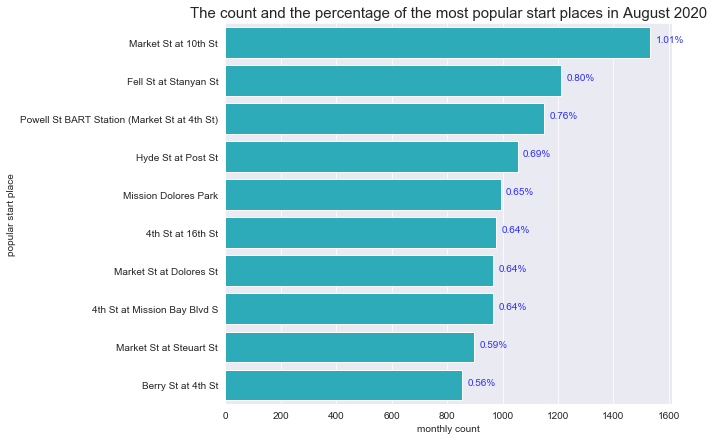

In [44]:
plt.figure(figsize = (8,7))
color = sns.color_palette()[9]
sns.countplot(data = popular_start_place,y = 'start_station_name',color = color,order = start.index)
plt.ylabel('popular start place')
plt.xlabel('monthly count')
plt.title('The count and the percentage of the most popular start places in August 2020',fontsize = 15);

for i in range(start.shape[0]):
    counts = start[i]
    pct_string = '{:.2f}%'.format(counts*100/df.shape[0])
    plt.text(counts+70,i,pct_string,ha = 'center',alpha = 0.8,color = 'b')
 

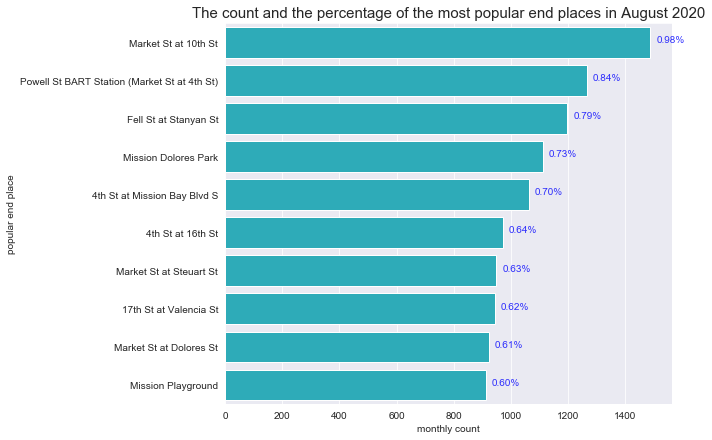

In [45]:
plt.figure(figsize = (8,7))
color = sns.color_palette()[9]
sns.countplot(data = popular_end_place,y = 'end_station_name',color = color,order = end.index)
plt.ylabel('popular end place')
plt.xlabel('monthly count')
plt.title('The count and the percentage of the most popular end places in August 2020',fontsize = 15);

for i in range(end.index.shape[0]):
    counts = end[i]
    pct_string = '{:.2f}%'.format(counts*100/df.shape[0])
    plt.text(counts+70,i,pct_string,ha = 'center',alpha = 0.8,color = 'b')  

Market St at 10th St are the most popular place for both the start place and end place,accounting for about 1% of the whole bike count in Aug 2020.

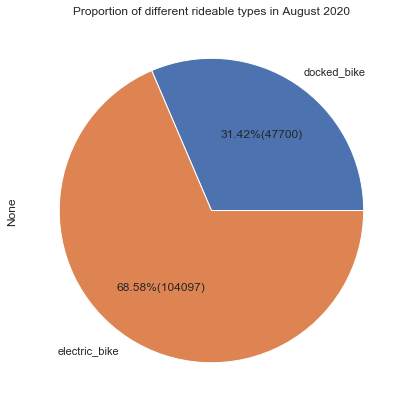

In [46]:
rideable_type = df.groupby('rideable_type').size().dropna()
sns.set(style = 'darkgrid')
rideable_type.plot(kind = 'pie',title = 'Proportion of different rideable types in August 2020',
                   figsize = (7,7),autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*rideable_type.sum()));

#### Observations:

The electric bike accounts for approximately 68.5 percentage of the whole bike count.

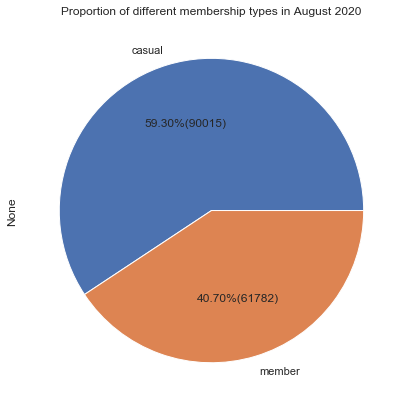

In [47]:
member_casual = df.groupby('member_casual').size().dropna()
sns.set(style = 'darkgrid')
member_casual.plot(kind = 'pie',title = 'Proportion of different membership types in August 2020',
                   figsize = (7,7),autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*rideable_type.sum()));

#### Observations:
The casual customers take up for about 60% of the bike count.

## Bivariate Analysis 

In [101]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df['log_duration'] = df['duration_in_min'].apply(log_trans)

In [102]:
def cuberoot_trans(x, inverse = False):
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

df['cuberoot_duration'] = df['duration_in_min'].apply(cuberoot_trans)

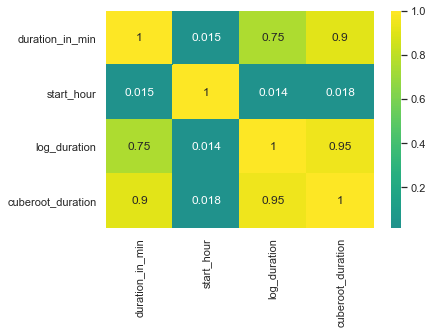

In [50]:
sns.heatmap(df.corr(),annot = True,center = 0,cmap = 'viridis');

It seems that the cuberoot_duration is slightly more correlted to start hour than log_duration and duration_in_min.

In [103]:
# Let's randomly take a sample to plot
sample1 = np.random.choice(df.shape[0],1000,replace = False)
df_sample1 = df.loc[sample1,:]

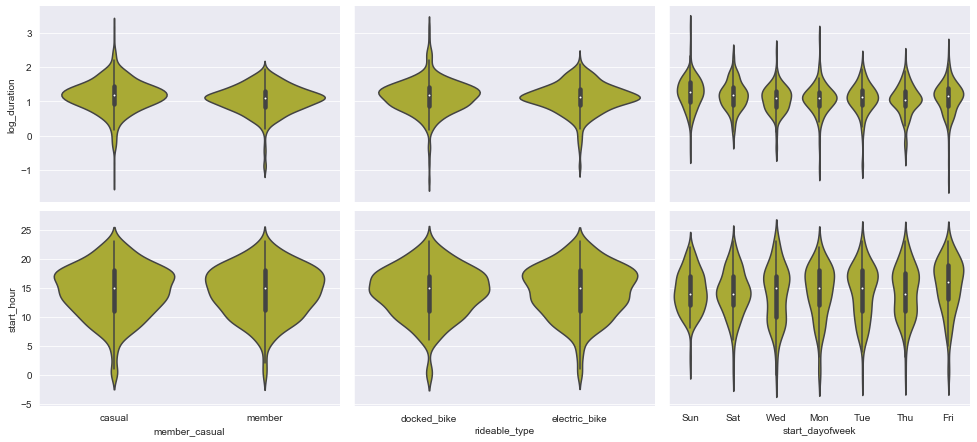

In [108]:
# plot matrix of numeric features against categorical features
sns.set_style('darkgrid')
categoric_vars = ['member_casual','rideable_type','start_dayofweek']

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[8]
    sns.violinplot(x, y, color = default_color)

g = sns.PairGrid(data = df_sample1,y_vars = ['log_duration','start_hour'],x_vars = categoric_vars,
            size = 3, aspect = 1.5);
g.map(boxgrid);

#### Observations:
1. The member user has smaller lower outlier compared to the casual users when it comes to log_duration.The median of log duration for casual users are slightly larger than that of the member users.The median of the start hour for both the two type of users are almost the same, which are approximately 15.
2. The median of the log_duration for the electric_bike and docked_bike are almost the same, which is slightly over one. dock_bike has smaller lower outliers than that of the electric_bike.The interquartile range of electric_bike is larger than than of the docked_bike when it comes to start_hour.
3. The median for log duration are approximately one.Friday has the smallest lower outlier of the whole week.The median of the start_hour is around 15.
4. There shouldn't be any negative values in start_hour,this issue requires further investigation.

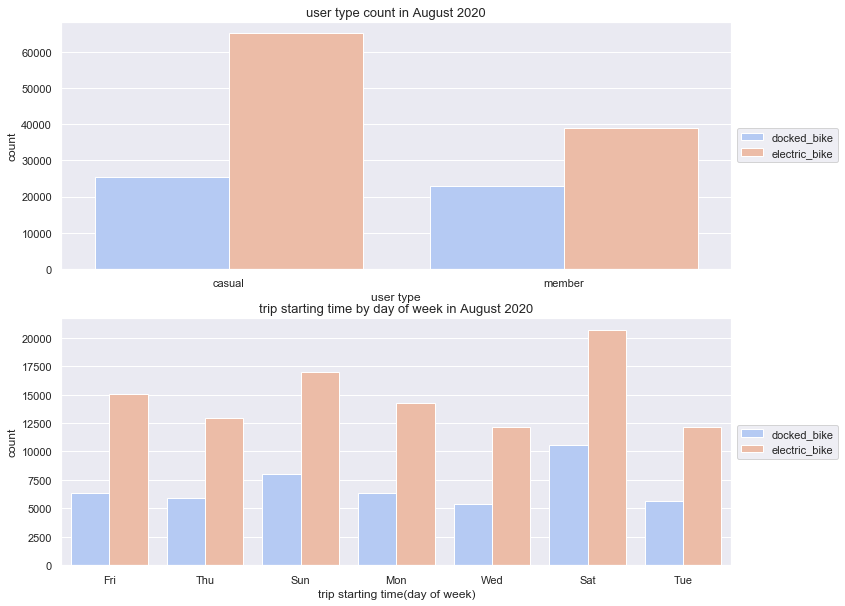

In [74]:
plt.figure(figsize = [12, 10])

#  subplot 1: rideable_type vs member_casual
plt.subplot(2, 1, 1)
sns.countplot(data = df, x = 'member_casual', hue = 'rideable_type', palette = 'coolwarm')
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))
plt.xlabel('user type')
plt.title('user type count in August 2020',fontsize = 13);

# subplot 2: start_dayofweek vs. rideable_type
ax = plt.subplot(2, 1, 2)
sns.countplot(data = df, x = 'start_dayofweek', hue = 'rideable_type', palette = 'coolwarm')
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))
plt.xlabel('trip starting time(day of week)')
plt.title('trip starting time by day of week in August 2020',fontsize = 13);


#### Observations:
1. For the casual users,the eletric bike users are more two times than that of the dock bike users while for member users,the eletric bike users are approximately 40% more than that of the dock bike users.
2. Saturday has the largest bike count for both the dock bikes and electric bikes.The number of the eletric bikes is larger than that of the dock bikes everyday during a week.

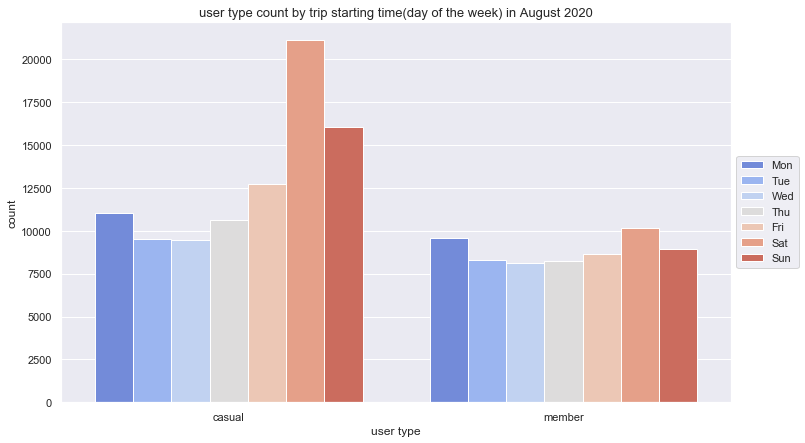

In [75]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_dayofweek'] = df['start_dayofweek'].astype(ordered_weekdays)

plt.figure(figsize=(12,7))
sns.countplot(data = df, x = 'member_casual', hue = 'start_dayofweek',palette = 'coolwarm')
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))
plt.xlabel('user type')
plt.title('user type count by trip starting time(day of the week) in August 2020',fontsize = 13);

#### Observations:
Saturday has the largest bike users regardless of member users or casual users.Sunday has the second largest bike users regardless of member users or casual users.The casual users are more than member users everyday during a week.

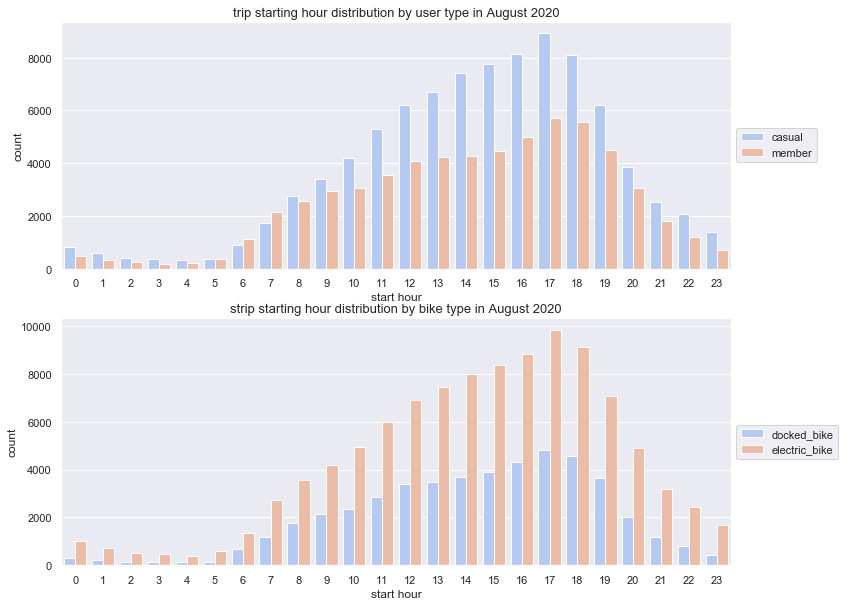

In [76]:
plt.figure(figsize = [12, 10])
# subplot 4: member_casual vs. start hour
ax = plt.subplot(2,1,1)
sns.countplot(data = df,x = 'start_hour',hue = 'member_casual',palette = 'coolwarm')
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))
plt.xlabel('start hour')
plt.title('trip starting hour distribution by user type in August 2020',fontsize = 13);

# subplot 5: member_casual vs. start hour
ax = plt.subplot(2,1,2)
sns.countplot(data = df,x = 'start_hour',hue = 'rideable_type',palette = 'coolwarm')
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))
plt.xlabel('start hour')
plt.title('strip starting hour distribution by bike type in August 2020',fontsize = 13);

#### Observations:

1. The number of casual users is larger than that of the member users every start hour except start hour 6 and 7.start hour 17 has the largest number for both casual users and member users.
2. The number of eletric bikes is larger than the number of the docked bikes every start hour of the day.start hour 17 has the largest number for both the docked bikes and eletric bikes.

In [77]:
df['rideable_type'].value_counts()

electric_bike    104200
docked_bike       48246
Name: rideable_type, dtype: int64

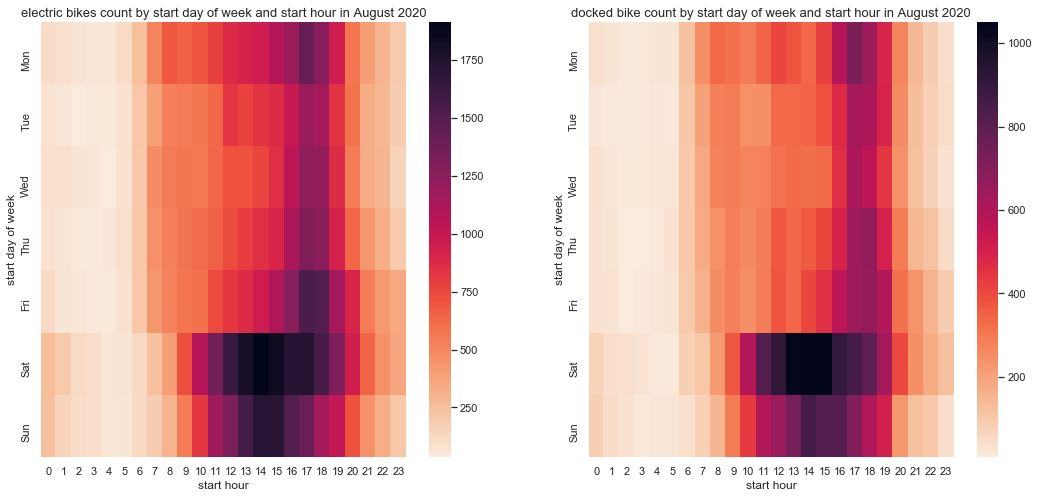

In [78]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
electric = df[df['rideable_type'] == 'electric_bike']
electric_count = electric.groupby(['start_dayofweek','start_hour']).size().reset_index(name = 'count').pivot(index = 'start_dayofweek',columns = 'start_hour',values = 'count')
sns.heatmap(electric_count,cmap = 'rocket_r')
plt.title('electric bikes count by start day of week and start hour in August 2020',fontsize = 13)
plt.xlabel('start hour')
plt.ylabel('start day of week');

plt.subplot(1,2,2)
docked = df[df['rideable_type'] == 'docked_bike']
docked_count = docked.groupby(['start_dayofweek','start_hour']).size().reset_index(name = 'count').pivot(index = 'start_dayofweek',columns = 'start_hour',values = 'count')
sns.heatmap(docked_count,cmap = 'rocket_r')
plt.title('docked bike count by start day of week and start hour in August 2020',fontsize = 13)
plt.xlabel('start hour')
plt.ylabel('start day of week');

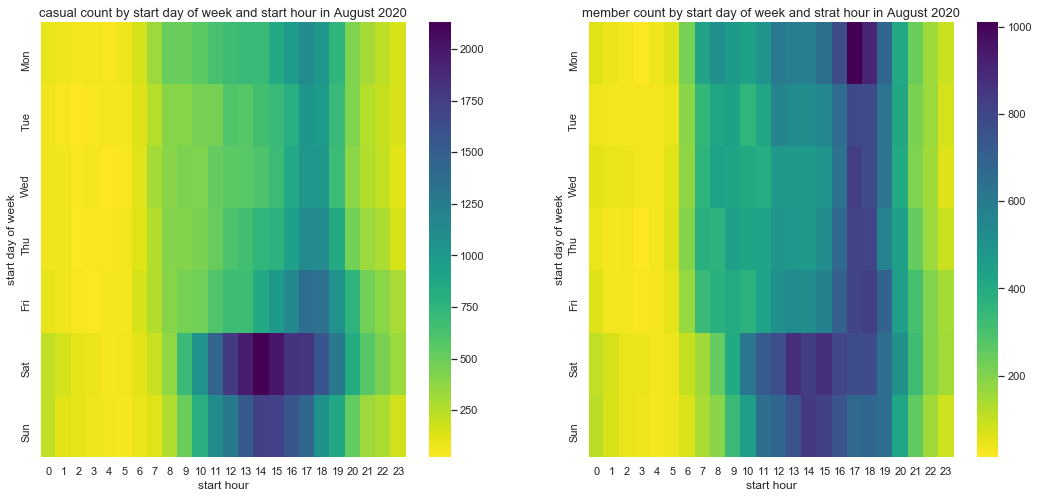

In [79]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
casual = df[df['member_casual']=='casual']
casual_count = casual.groupby(['start_dayofweek','start_hour']).size().reset_index(name = 'count').pivot(index = 'start_dayofweek',columns = 'start_hour',values = 'count')
sns.heatmap(casual_count,cmap = 'viridis_r')
plt.title('casual count by start day of week and start hour in August 2020',fontsize = 13)
plt.xlabel('start hour')
plt.ylabel('start day of week');

plt.subplot(1,2,2)
member = df[df['member_casual']=='member']
member_count = member.groupby(['start_dayofweek','start_hour']).size().reset_index(name = 'count').pivot(index = 'start_dayofweek',columns = 'start_hour',values = 'count')
sns.heatmap(member_count,cmap = 'viridis_r')
plt.title('member count by start day of week and strat hour in August 2020',fontsize = 13)
plt.xlabel('start hour')
plt.ylabel('start day of week');

#### Observations:
1. Saturday afternoon has the largest number of bike use count regardless of rideable type. Saturday afternoon has the largest number of casual users while monday afternoon has the largest number of member users.
2. During day time, the bike user count is larger than that of the night regardless of rideable type and user type.

### Talk about some of the relationships you observed in this part of the investigation.How did the features of interest vary with other features in the dataset?

My main feature is pretty independent,the correlation coefficient between the cuberoot form of the the duration_in_min and the start hour of the day is 0.018,which means that there is extremely weak relations between these two variables.

### Did you observe any interesting relationship between the other features(not the main features of interest)?
1. For the casual users,the eletric bike users are more two times than that of the dock bike users while for member users,the eletric bike users are approximately 40% more than that of the dock bike users.
2. Saturday has the largest bike count for both the dock bikes and electric bikes.The number of the eletric bikes is larger than that of the dock bikes everyday during a week.
3. Saturday has the largest bike users regardless of member users or casual users.Sunday has the second largest bike users regardless of member users or casual users.The casual users are more than member users everyday during a week.
4. The number of casual users is larger than that of the member users every start hour except start hour 6 and 7.start hour 17 has the largest number for both casual users and member users.
5. The number of eletric bikes is larger than the number of the docked bikes every start hour of the day.start hour 17 has the largest number for both the docked bikes and eletric bikes.
6. Saturday afternoon has the largest number of bike use count regardless of rideable type. Saturday afternoon has the largest number of casual users while monday afternoon has the largest number of member users.
7. During day time, the bike user count is larger than that of the night regardless of rideable type and user type.

# Multivariate Analysis

In [136]:
df['cuberoot_duration'].describe()

count    151797.000000
mean          2.396140
std           0.749616
min           0.215443
25%           1.924701
50%           2.322650
75%           2.786242
max           5.847353
Name: cuberoot_duration, dtype: float64

In [137]:
df['log_duration'].describe()

count    151797.000000
mean          1.068925
std           0.449357
min          -2.000000
25%           0.853090
50%           1.097951
75%           1.335057
max           2.300878
Name: log_duration, dtype: float64

In [141]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_y = np.arange(cuberoot_trans(0.2), cuberoot_trans(5.9)+0.05,0.05)
    bins_x = np.arange(0, 23+1, 1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette,cmin = 0.5)

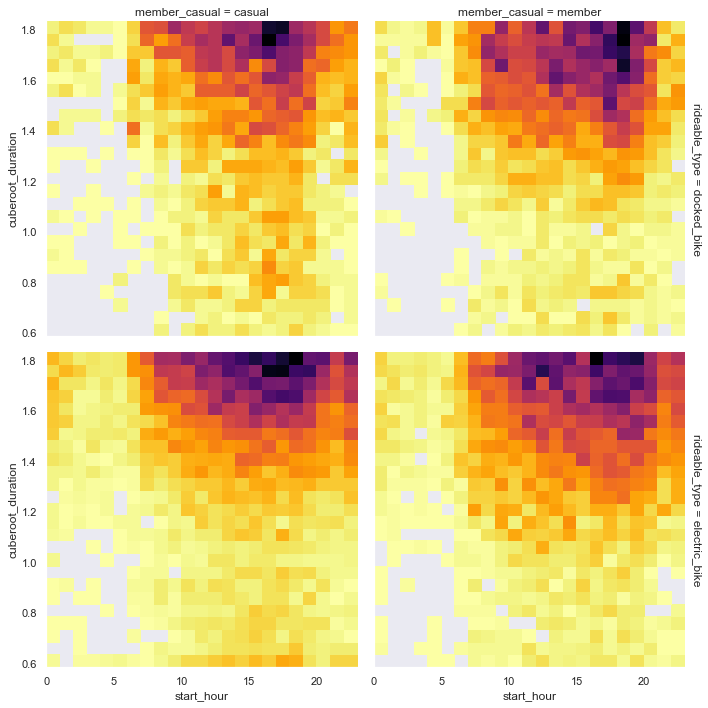

In [142]:
g = sns.FacetGrid(data = df,row = 'rideable_type',col = 'member_casual',height = 5,margin_titles = True)
g.map(hist2dgrid,'start_hour','cuberoot_duration',color = 'inferno_r');

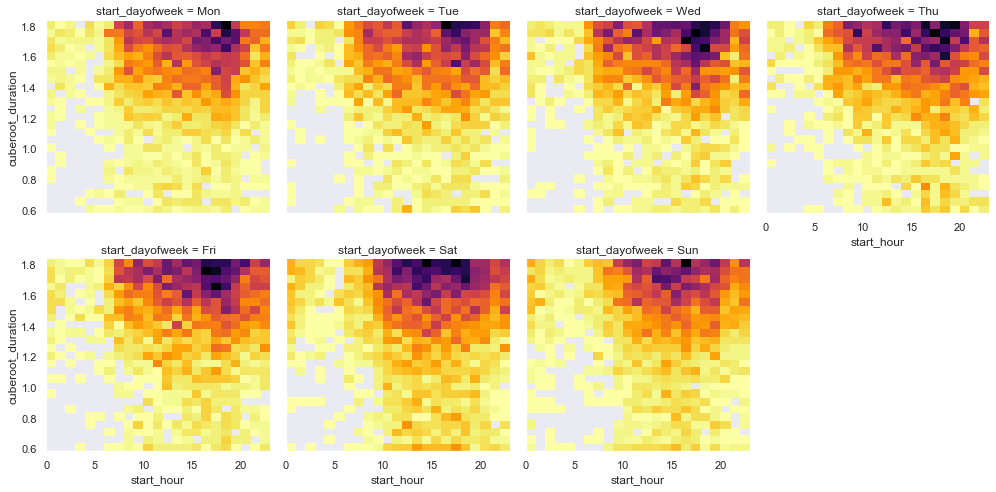

In [60]:
g = sns.FacetGrid(data = df,col = 'start_dayofweek',height = 3.5,col_wrap = 4,margin_titles = True)
g.map(hist2dgrid,'start_hour','cuberoot_duration',color = 'inferno_r');

#### Observations:
1. Saturday has the longest duration.
2. Longest duration usually take place in the afternoon.


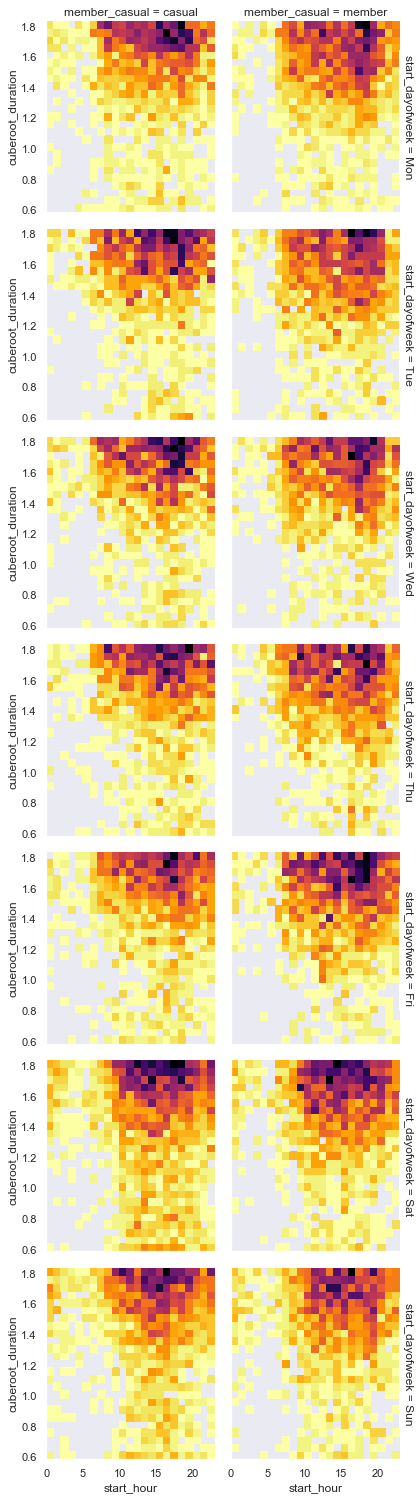

In [61]:
g = sns.FacetGrid(data = df,row = 'start_dayofweek',col = 'member_casual',height = 3,margin_titles = True)
g.map(hist2dgrid,'start_hour','cuberoot_duration',color = 'inferno_r');

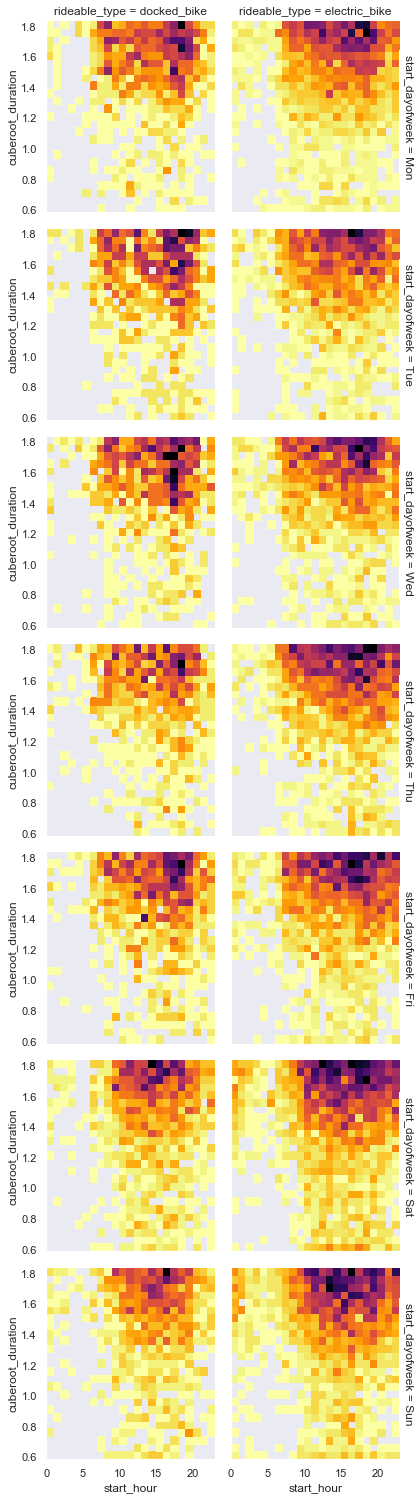

In [62]:
g = sns.FacetGrid(data = df,row = 'start_dayofweek',col = 'rideable_type',height = 3,margin_titles = True)
g.map(hist2dgrid,'start_hour','cuberoot_duration',color = 'inferno_r');

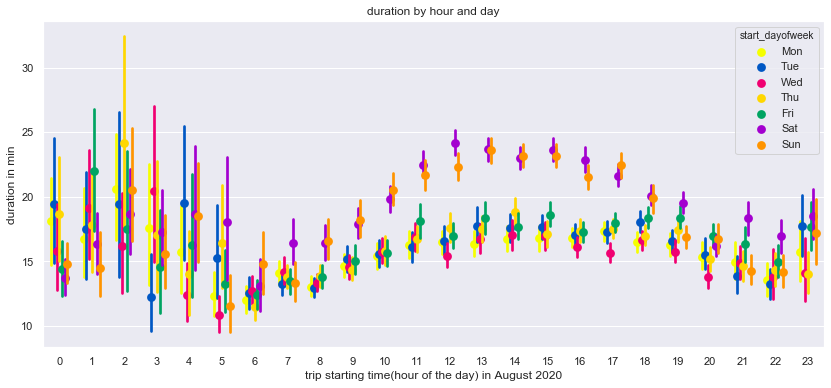

In [82]:
plt.figure(figsize = (14,6))
sns.pointplot(data = df ,x = 'start_hour',y = 'duration_in_min',hue = 'start_dayofweek',
              linestyles = "",dodge = 0.5,palette = 'prism')
plt.xlabel('trip starting time(hour of the day) in August 2020')
plt.ylabel('duration in min')
plt.title('duration by hour and day');

#### Observations:
The duration of the bike use at weekends is longer than that of the weekdays. The difference is especially large during the day time.

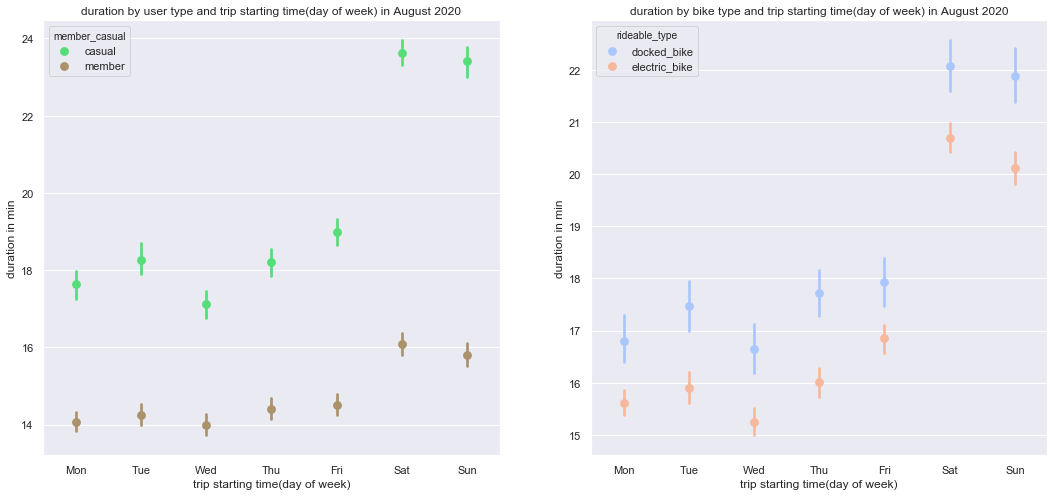

In [83]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.pointplot(data = df,x = 'start_dayofweek',y = 'duration_in_min',hue = 'member_casual',palette = 'terrain',linestyles = '')
plt.xlabel('trip starting time(day of week)')
plt.ylabel('duration in min')
plt.title('duration by user type and trip starting time(day of week) in August 2020');

plt.subplot(1,2,2)
sns.pointplot(data = df,x = 'start_dayofweek',y = 'duration_in_min',hue = 'rideable_type',palette = 'coolwarm',linestyles = '')
plt.xlabel('trip starting time(day of week)')
plt.ylabel('duration in min')
plt.title('duration by bike type and trip starting time(day of week) in August 2020');

#### observations: 
1. The bike use duration for casual users is longer than that of the member users for everyday of the week.   
2. The bike use duration for docked bike is longer than that of the electric bikes for everyday of the week. 
3. The duration at weekends is longer than duration of the weekdays.
4. The difference in duration between the casual users and members is larger at weekends than on weekdays.

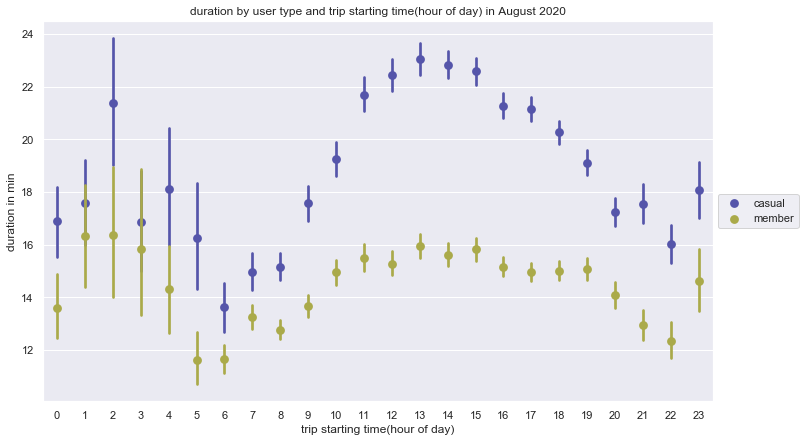

In [84]:
plt.figure(figsize = (12,7))

sns.pointplot(data = df,x = 'start_hour',y = 'duration_in_min',hue = 'member_casual',palette = 'gist_stern',linestyles = '');
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))
plt.xlabel('trip starting time(hour of day)')
plt.ylabel('duration in min')
plt.title('duration by user type and trip starting time(hour of day) in August 2020');


### Observations:
1. The bike use duration for casual users is longer than that of the member users almost for every start hour of the day.  
2. The difference in duration between casual users and member users is the largest during the afternoon.

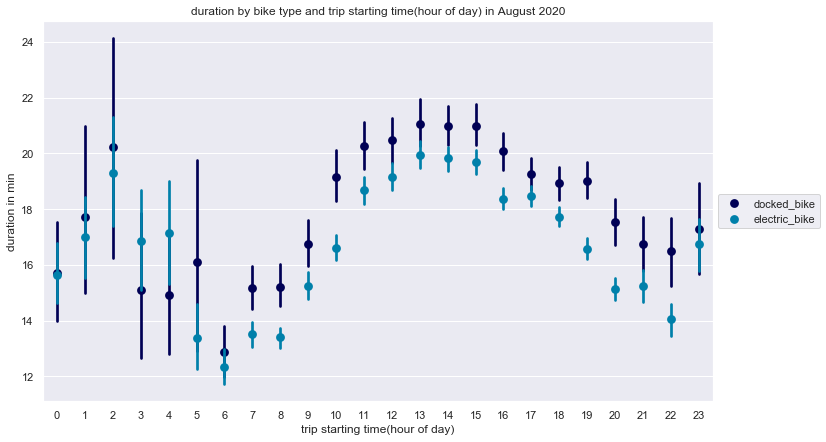

In [85]:
plt.figure(figsize = (12,7))
sns.pointplot(data = df,x = 'start_hour',y = 'duration_in_min',hue = 'rideable_type',palette = 'ocean',linestyles = '');
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))
plt.xlabel('trip starting time(hour of day)')
plt.ylabel('duration in min')
plt.title('duration by bike type and trip starting time(hour of day) in August 2020');

#### Observations:

The bike use duration for docked bike is longer than that of the electric bikes for almost every start hour of the day. 


### Talk about some of the relationships you observed in this part of the investigation.How did the features of interest vary with other features in the dataset?
During my investigation of the relationships in this part,we didn't observed features that strengthened each other in terms of looking features to my interest.

### Were there any interesting or surprising interactions between features?
1. Saturday afternoon has the largest number of bike use count regardless of bike rideable types .
2. The bike user count is larger during the day time than that of the night regardless of bike rideable type or user type.
3. The bike use duration at weekends is longer than duration on the weekdays.
4. Longest duration of the day usually takes place in the afternoon.
5. The bike use duration for casual users is longer than that of the member users for almost every start hour of the day and everyday of the week.   
6. The bike use duration for docked bike is longer than that of the electric bikes for almost every start hour of the day and everyday of the week.
7. The difference in duration between casual users and member users is the largest during the start hour in the  afternoon.
8. The difference in duration between the casual users and members is larger at weekends compared to weekdays.

In [ ]:
!jupyter nbconvert Analysis_and_visualization_of_Baywheels_Project.ipynb --to slides --template output-toggle.tpl --post serve

[NbConvertApp] Converting notebook Analysis_and_visualization_of_Baywheels_Project.ipynb to slides
[NbConvertApp] Writing 822319 bytes to Analysis_and_visualization_of_Baywheels_Project.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Analysis_and_visualization_of_Baywheels_Project.slides.html
Use Control-C to stop this server


In [242]:
!jupyter nbconvert slides_for_visualization.ipynb --to pdf

[NbConvertApp] Converting notebook slides_for_visualization.ipynb to pdf
[NbConvertApp] Support files will be in slides_for_visualization_files/
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvertApp] Making directory ./slides_for_visualization_files
[NbConvert

## End